# Settings

In [20]:


import numpy as np
import librosa as lr
import matplotlib.pyplot as plt
import soundfile as sf
import utils

# plt.rcParams["figure.figsize"] = (5,5)
# plt.rc('font', size=20)
# plt.rc('axes', labelsize=25)
# plt.rc('xtick', labelsize=25)
# plt.rc('ytick',labelsize=25)
# plt.rc('legend', fontsize=20)
# plt.rc('figure', titlesize=50)
# plt.rc('figure', autolayout=True)

sr = 16000
win_time = 0.02
dftlen = 512
# Window Sample의 길이 표현
win_len = int(win_time * sr)
hop_len = int(win_len * 0.5)
print("Window Len:",win_len)
print("Hop Len:",hop_len)


Window Len: 320
Hop Len: 160


## Windowing and Overlapping

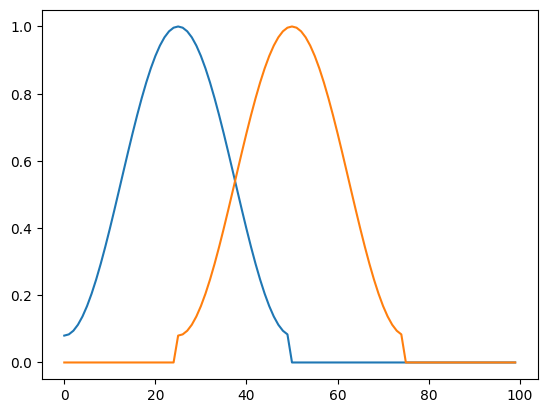

In [21]:
## Overlap Test

h = lr.filters.get_window(window="hamming", Nx=50)
z = np.zeros_like(h)
h = np.concatenate([h,z])
h2 = np.roll(h,25)
plt.plot(h)
plt.plot(h2)
plt.show()

h3 = h+h2+np.roll(h2,25)
# print(h3)
# plt.plot(h3)
# plt.show()


### OLA를 하려면 hamming은 1.08배 scale이 되어야 하는구나!

Loaded: yonseicrop.wav, Shape: (18000,), Original sr: 16000


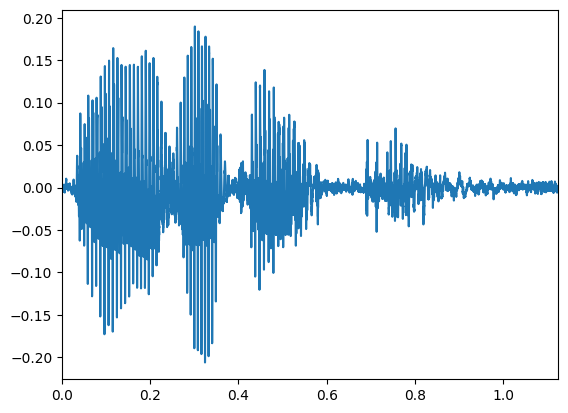

In [22]:
###
### Read input waves
file_path = "yonseicrop.wav"

### Read Audio Files
yr,ori_sr = lr.load(file_path,sr=sr)
print(f"Loaded: {file_path}, Shape: {np.array(yr).shape}, Original sr: {ori_sr}")
    
# Time axis
time = np.linspace(0,len(yr),len(yr),endpoint=False)/sr
plt.plot(time,yr)
# plt.plot(yr)
# plt.ylim(bottom=-0.135, top=0.05)
plt.xlim(0,time[-1])
plt.show()



From 18000 samples, total 111 frames are generated


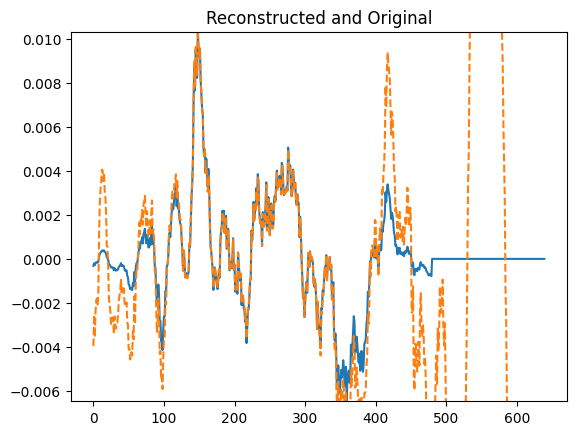

In [23]:
### Frame Extractor
### Extract frames by windowing

FE = utils.FrameExtractor(yr,win_len,hop_len)
frame_arr = FE.extract_frames(win_type="hamming")

# plt.plot(frame_arr[0])
# plt.plot(frame_arr[1])
# plt.show()

x = np.concatenate([frame_arr[0],np.zeros_like(frame_arr[0])])
y = np.concatenate([frame_arr[1],np.zeros_like(frame_arr[1])])
y = np.roll(y,hop_len)
z = x+y / 1.08

plt.plot(z)
plt.ylim(np.min(z),np.max(z))

# plt.show()
plt.plot(yr[:win_len*2],'--')
plt.ylim(np.min(z),np.max(z))
plt.title("Reconstructed and Original")
plt.show()

startind: 0
startind: 160
startind: 320
startind: 480
startind: 640


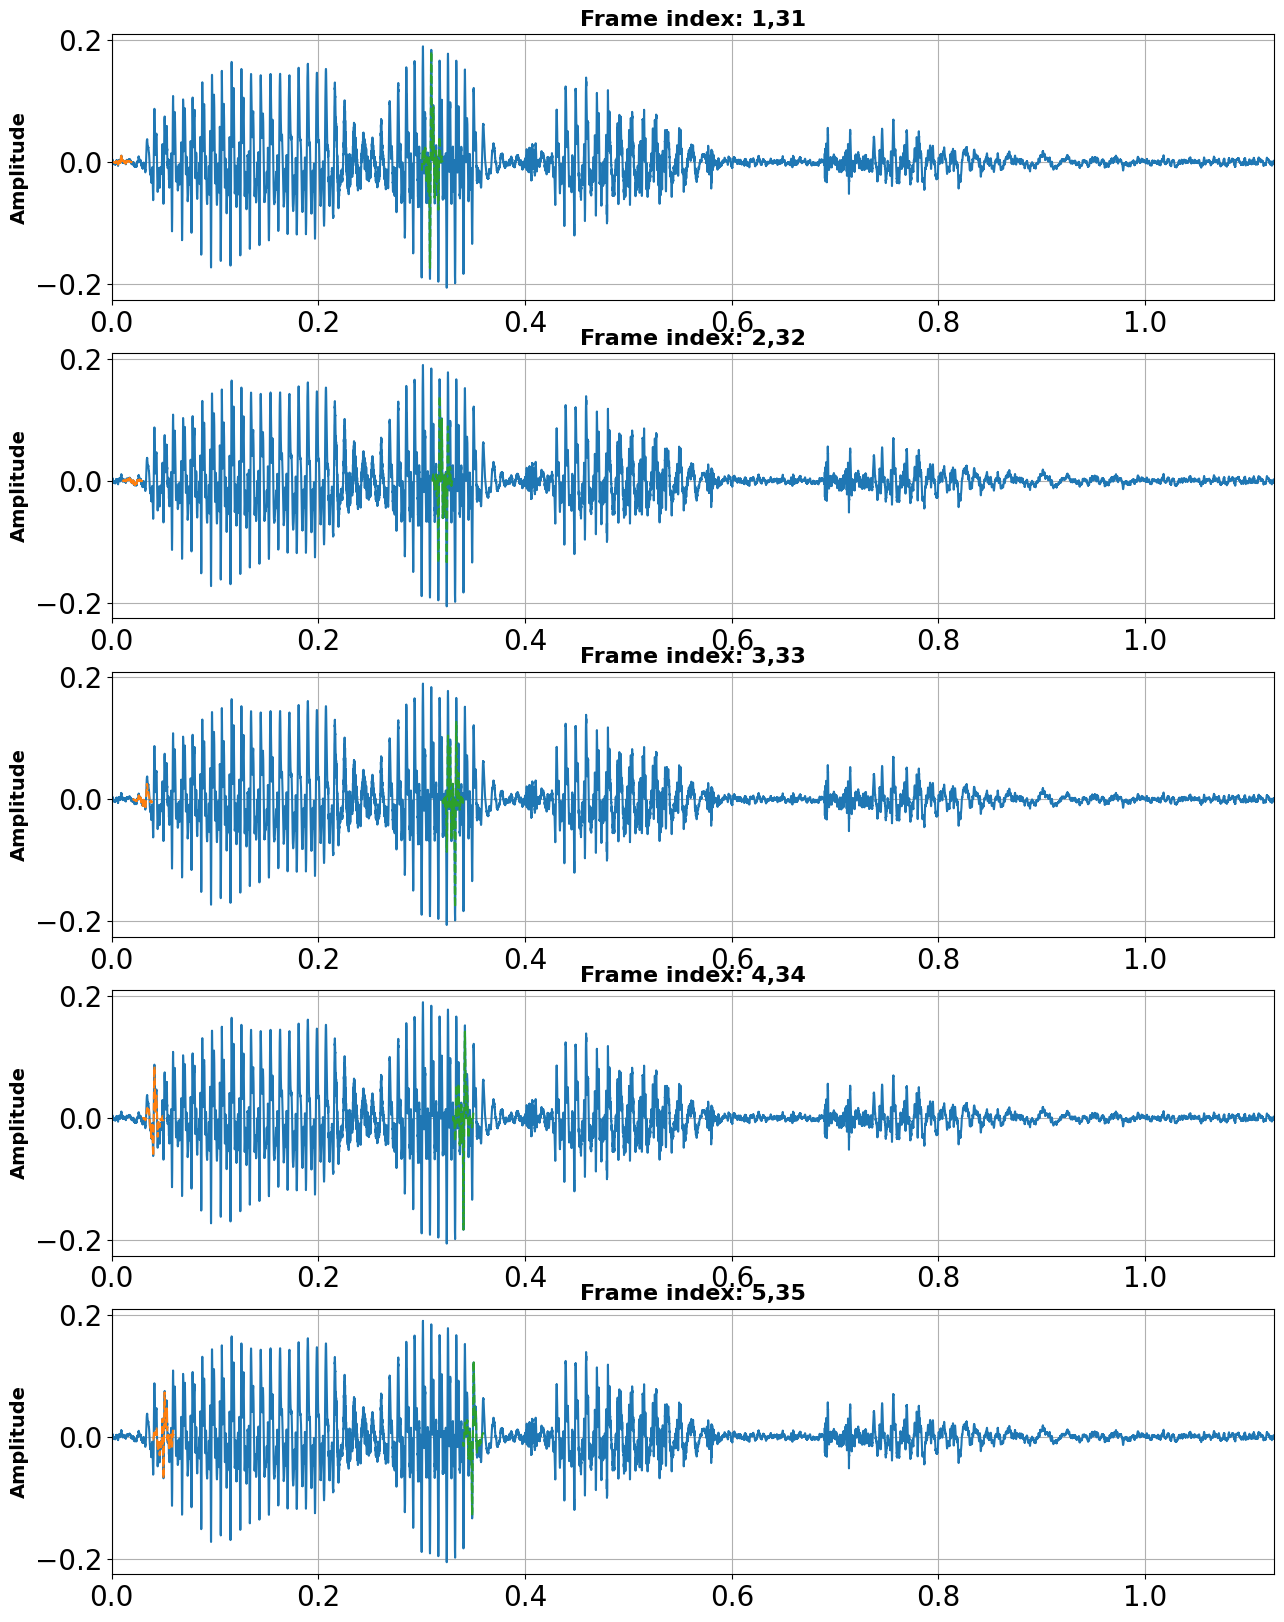

In [36]:
## 0번 frame 부터 5개를 표시해보자
ind1 = 0
ind2 = 30
fig, axes = plt.subplots(5,1,figsize=(15,20))

time = np.arange(0, len(yr)/sr, 1/sr)
for i in range(5):
    startind1 = FE.hop_len * ind1
    endind1 = FE.hop_len * ind1 + FE.win_len
    startind2 = FE.hop_len * ind2
    endind2 = FE.hop_len * ind2 + FE.win_len
    print("startind:", startind1)
    frame1 = frame_arr[ind1]
    frame2 = frame_arr[ind2]
    ind1 += 1
    ind2 += 1

    # 기존 waveform 그리기
    axes[i].plot(time, yr, label='waveform')
    
    # 추출된 frame 그리기
    axes[i].plot(time[startind1: endind1], frame1, label='frame {}'.format(2*i + 1), linestyle='--')
    axes[i].plot(time[startind2: endind2], frame2, label='frame {}'.format(2*i + 2), linestyle='--')
    
    # axes[i].set_xlabel('Time(s)', fontsize=18, fontweight='bold')
    axes[i].set_ylabel('Amplitude', fontsize=14, fontweight='bold')
    axes[i].set_title('Frame index: {},{}'.format(ind1, ind2), fontsize=16, fontweight='bold')
    axes[i].tick_params(axis='both', labelsize=20)
    axes[i].set_xlim(0, time[-1])

    # axes[i].legend(fontsize=20,loc='lower left')
    axes[i].grid()
    
    # plt.figure(figsize=[15,6])
    # plt.subplot(2,2,1)
    # plt.plot(frame1)
    # plt.grid()
    # plt.xlim(0,len(frame1)-1)
    # plt.title("Unvoiced")
    # plt.xlabel("Samples")
    # plt.subplot(2,2,2)
    # plt.plot(frame2)
    # plt.grid()
    # plt.xlim(0,len(frame2)-1)
    # plt.title("voiced")
    # plt.xlabel("Samples")

# plt.tight_layout()  # subplot 간의 간격 조절
plt.show()


In [54]:
## 각 frame 에서의 autocorrelation 계산 해보기

def auto_corr(signal):
    corr = np.correlate(signal, signal, mode='full')
    corr = corr[len(corr)//2:]
    return corr
i=0
# for frame in frame_arr:
#     i+=1
#     ## 각 frame 내부에서 autocorrelation 계산해보기
#     plt.plot(frame)
#     plt.show()
    
#     ac = auto_corr(frame)
#     print(len(ac),"aclen")
#     plt.plot(ac)
#     plt.show()
    
#     if i == 3:
#         break 

########################
# frame = frame_arr[30]
# plt.plot(frame)
# plt.show()

# ac = auto_corr(frame)
# print(len(ac),"aclen")
# plt.plot(ac)
# plt.show()
    

def LPC(frame, order=10):
    return 0

def make_toeplitz(ac):
    p = len(ac)
    toeplitz_mat = np.zeros((p,p))
    
    print(toeplitz_mat.shape)
    
    for i in range(p):
        toeplitz_mat[i,:] = ac[i:i+p][::-1]

    return toeplitz_mat

# 예제 자동 상관 함수
auto_corr_sequence = np.array([1, 0.5, 0.2, 0.1])

# Toeplitz 행렬 생성
toeplitz_result = make_toeplitz(auto_corr_sequence)

print("Toeplitz Matrix:")
print(toeplitz_result)


(4, 4)


ValueError: could not broadcast input array from shape (3,) into shape (4,)